## Tabluation of results of all drugs that have been sold and account of each durg's effectiveness using Drug's Name, Popularity and use case of each drug

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import seaborn as sns 
import ipywidgets 
from ipywidgets import interact


In [4]:
csv = pd.read_csv('drug.csv')
print("shape of dataset", csv.shape)

shape of dataset (161297, 7)


In [5]:
csv.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
csv.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [13]:
print("Unique values => ",csv.drugName.nunique())
print("Unique medical condition => ",csv.condition.nunique())
print("Starting Date => ",csv.date.max())
print("Ending Date => ",csv.date.min())

Unique values =>  3436
Unique medical condition =>  884
Starting Date =>  9-Sep-17
Ending Date =>  1-Apr-08


In [20]:
csv[["rating","usefulCount"]].describe()
# Most of the reviews are positive

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [31]:
# checking the Number and Name of the Drugs with 0 Useful Count in Details
print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", csv[csv['usefulCount'] == 0].count()[0])

# checking the Number of Drugs with No Usesful Count with Review Greater than or Equal to 8
print("Number of Good Drugs with Lesser Useful Count :", csv[(csv['usefulCount'] == 0) &
                                                csv['rating'] >= 8].count()[0])

# checking the Average Rating of the Drugs with No Useful Count
print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(csv[csv['usefulCount'] == 0]['rating'].mean()))

print("\nAnalysis on Useful Drugs")
print("----------------------------")
print("The Number of Drugs with Greater than 1000 Useful Counts :", csv[csv['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", csv[csv['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of these Drugs: \n\n", 
    csv[csv['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 6318
Number of Good Drugs with Lesser Useful Count : 0
Average Rating of Drugs with No Useful Count : 5.80

Analysis on Useful Drugs
----------------------------
The Number of Drugs with Greater than 1000 Useful Counts : 4
Average Rating of Drugs with 1000+ Useful Counts : 10.0

Name and Condition of these Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [44]:
csv[['drugName','condition','review']].describe(include=object)

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [47]:
csv.isnull().sum()
csv.dropna(inplace = True)

In [51]:
csv.isnull().sum().sum()

0

C:\Users\jasme\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jasme\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


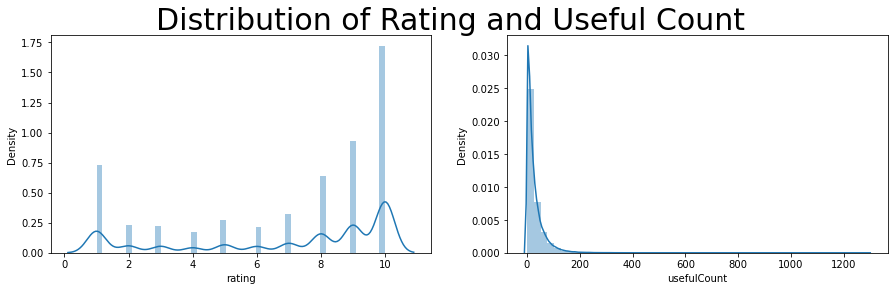

In [56]:
# lets check the Distribution of Rating and Useful Count

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(csv['rating'])

plt.subplot(1, 2, 2)
sns.distplot(csv['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 30)
plt.show()

C:\Users\jasme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


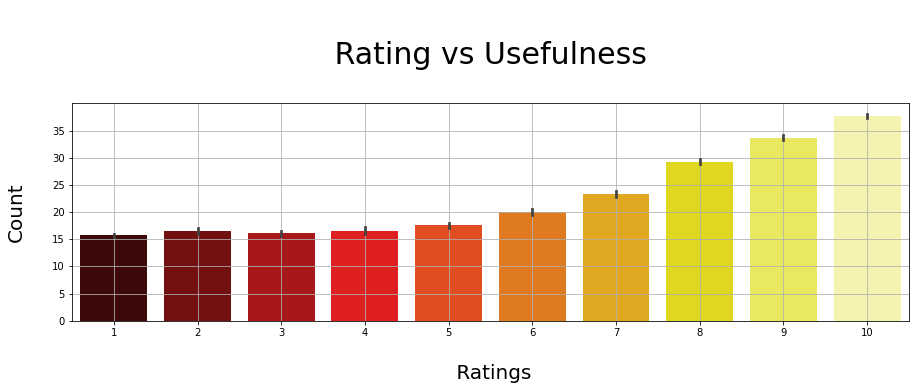

In [60]:
# lets check the Impact of Ratings on Usefulness

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(csv['rating'], csv['usefulCount'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings',fontsize = 20)
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 30)
plt.show()

In [62]:
# Checking whether Length of Review has any Impact on Ratings of the Drugs

# for that we need to create a new column to calculate length of the reviews
csv['len']  = csv['review'].apply(len)


# lets check the Impact of Length of Reviews on Ratings
csv[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [77]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jasme\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [82]:
# as it is clear that the reviews have so many unnecassry things such as Stopwords, Punctuations, numbers etc

# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

csv['review'] = csv['review'].apply(punctuation_removal)

# Removing the Stopwords also

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

csv['review'] = csv['review'].apply(stopwords_removal)

In [86]:
# removing Numbers also

import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

csv['review'] = csv['review'].apply(drop_numbers)

## Sentimental Analysis

In [87]:
# for using Sentiment Analyzer we will have to dowload the Vader Lexicon from NLTK

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jasme\AppData\Roaming\nltk_data...


True

In [88]:
# lets calculate the Sentiment from Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in csv['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
csv['sentiment'] = pd.Series(data=train_sentiments)

In [90]:
# Sentiment on Reviews
csv[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.6486  0.001019  0.6369
2        -0.5423  0.000796  0.6369
3        -0.6369  0.000436  0.6249
4         0.0000  0.001576  0.6369
5        -0.5423  0.000802  0.6249
6         0.0000  0.001016  0.6369
7        -0.5423  0.000973  0.6369
8        -0.4404  0.000921  0.6369
9        -0.6597  0.000966  0.6369
10       -0.6486  0.001085  0.6369

In [91]:
# as we can see that Sentiment and length of the review are not related to Reviews, we will drop the sentiment column

# Removing the unique Id, date, review, len, and sentiment column also
csv = csv.drop(['date','uniqueID','sentiment','review','len'], axis = 1)

# lets check the name of columns now
csv.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

In [92]:
# Lets Calculate an Effective Rating


min_rating = csv['rating'].min()
max_rating = csv['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -2)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
    
csv['eff_score'] = csv['rating'].apply(scale_rating)

In [93]:
# Calculating Usefulness Score

csv['usefulness'] = csv['rating']*csv['usefulCount']*csv['eff_score']

# Checking the Top 10 Most Useful Drugs with their Respective Conditions
csv[['drugName','condition','usefulness']][csv['usefulness'] > 
                            csv['usefulness'].mean()].sort_values(by = 'usefulness', 
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Phentermine,Weight Loss,7960
6,Adipex-P,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


In [100]:
# Calculating the Number of Useless and Useful Drugs for Each Condition

@interact
def check(condition = list(csv['condition'].value_counts().index)):
    return csv[csv['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

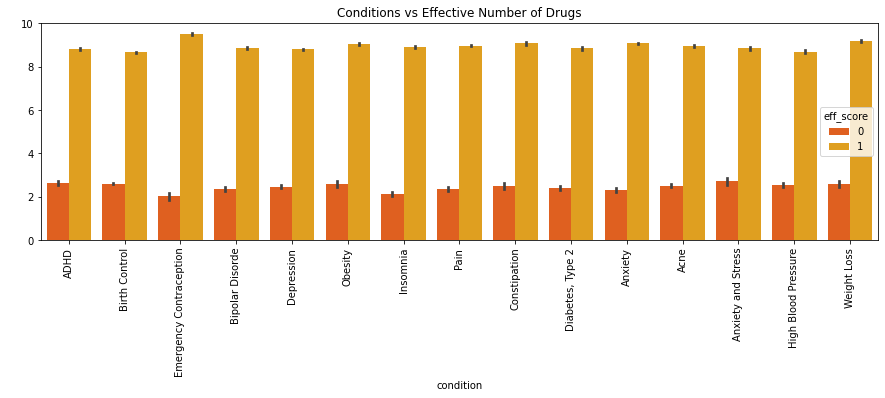

In [109]:
# lets check this in Graph, 

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane','Constipation','Anxiety and Stress')
conditions = csv.loc[csv['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = csv['eff_score'], 
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [111]:
# lets check the Most Common Conditions

print("Number of Unique Conditions :", csv['condition'].nunique())
csv['condition'].value_counts().head()

Number of Unique Conditions : 884


Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: condition, dtype: int64

In [113]:
# lets check Drugs, which were useful to Highest Number of Poeple
csv[['drugName','usefulCount']][csv['usefulCount'] >
                    csv['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head().reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949


In [120]:
# Dropping Duplicates
csv = csv.drop_duplicates()

In [121]:
# lets find the Highest and Lowest Rated Drugs for each Condition

@interact
def high_low_rate(condition = list(csv['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(csv[csv['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(csv[csv['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…